<a href="https://colab.research.google.com/github/vikumar01/Authorship-Attribution-based-on-Stylometry/blob/master/Spacy_used.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import spacy.cli 
#spacy.cli.download("en_core_web_lg")

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The text we want to examine
text = """London is the capital and most populous city of England and 
the United Kingdom.  Standing on the River Thames in the south east 
of the island of Great Britain, London has been a major settlement 
for two millennia. It was founded by the Romans, who named it Londinium.
"""

# Parse the text with spaCy. This runs the entire pipeline.
doc = nlp(text)

# 'doc' now contains a parsed version of text. We can use it to do anything we want!
# For example, this will print out all the named entities that were detected:
for entity in doc.ents:
    print(f"{entity.text} ({entity.label_})")


London (GPE)
England (GPE)
the United Kingdom (GPE)
the River Thames (LOC)
the south east 
 (LOC)
Great Britain (GPE)
London (GPE)
two millennia (DATE)
Romans (NORP)
Londinium (ORG)


In [6]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_lg")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
earlier this week DATE


In [14]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [0]:
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
color = sns.color_palette()

train_df = pd.read_csv(io.BytesIO(upload['train.csv']))

In [19]:
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [0]:
def extract_nouns(text):
    """Extract a few types of nouns, and beginning, middle and end idx using spaCy's POS (part of speech) tagger. 
    Keyword arguments:
    text -- the actual text source from which to extract entities
    """
    keep_pos = ['PROPN', 'NOUN']
    return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos]

In [0]:
  def add_nouns(train_df):
    train_df['nouns'] = train_df['text'].apply(extract_nouns)


In [36]:
add_nouns(train_df)
display(train_df)

,id,text,author,nouns,named_ents
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[]
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[]
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[]
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]"
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[]
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[landscape, painter, brush]",[]
19575,id08973,The lids clenched themselves together as if in...,EAP,"[lids, spasm]",[]
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, agir, Frenchman]","[Mais il faut agir, Frenchman]"
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[item, news]",[]


In [0]:
def extract_named_ents(text):
    return [(ent.text) for ent in nlp(text).ents]

def add_named_ents(train_df):
    train_df['named_ents'] = train_df['text'].apply(extract_named_ents)   

In [32]:
add_named_ents(train_df)
display(train_df)

,id,text,author,nouns,named_ents
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[]
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[]
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[]
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]"
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[]
...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[landscape, painter, brush]",[]
19575,id08973,The lids clenched themselves together as if in...,EAP,"[lids, spasm]",[]
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, agir, Frenchman]","[Mais il faut agir, Frenchman]"
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[item, news]",[]


In [0]:
def extract_verb(text):
    """Extract a few types of nouns, and beginning, middle and end idx using spaCy's POS (part of speech) tagger. 
    Keyword arguments:
    text -- the actual text source from which to extract entities
    """
    keep_pos = ['VERB']
    return [(tok.text) for tok in nlp(text) if tok.pos_ in keep_pos]

In [0]:
  def add_verb(train_df):
    train_df['verb'] = train_df['text'].apply(extract_verb)


In [39]:
add_verb(train_df)
display(train_df)

,id,text,author,nouns,named_ents,verb
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[],"[afforded, ascertaining, might, make, return, ..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[],"[occurred, might]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[],"[capered, cutting, took]"
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]","[looked, spread, speckled, looked, cheering]"
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[],"[Finding, abandoned, steals, sits, thinking]"
...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[landscape, painter, brush]",[],"[could, fancied, looked, built]"
19575,id08973,The lids clenched themselves together as if in...,EAP,"[lids, spasm]",[],[clenched]
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, agir, Frenchman]","[Mais il faut agir, Frenchman]","[say, faints]"
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[item, news]",[],"[strikes, received]"


In [0]:
def extract_pos(text):
    return [(tok.text,tok.pos_) for tok in nlp(text) ]

def add_all(train_df):
    train_df['all_pos'] = train_df['text'].apply(extract_pos)

In [41]:
add_all(train_df)
display(train_df)

,id,text,author,nouns,named_ents,verb,all_pos
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[],"[afforded, ascertaining, might, make, return, ...","[(This, DET), (process, NOUN), (,, PUNCT), (ho..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[],"[occurred, might]","[(It, PRON), (never, ADV), (once, ADV), (occur..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[],"[capered, cutting, took]","[(In, ADP), (his, DET), (left, ADJ), (hand, NO..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]","[looked, spread, speckled, looked, cheering]","[(How, ADV), (lovely, ADJ), (is, AUX), (spring..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[],"[Finding, abandoned, steals, sits, thinking]","[(Finding, VERB), (nothing, PRON), (else, ADV)..."
...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"[landscape, painter, brush]",[],"[could, fancied, looked, built]","[(I, PRON), (could, VERB), (have, AUX), (fanci..."
19575,id08973,The lids clenched themselves together as if in...,EAP,"[lids, spasm]",[],[clenched],"[(The, DET), (lids, NOUN), (clenched, VERB), (..."
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"[Mais, agir, Frenchman]","[Mais il faut agir, Frenchman]","[say, faints]","[(Mais, PROPN), (il, X), (faut, X), (agir, PRO..."
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"[item, news]",[],"[strikes, received]","[(For, ADP), (an, DET), (item, NOUN), (of, ADP..."


In [0]:
train_df['noun_tokens'] = [len(token) for token in train_df.nouns]
train_df['entity_tokens'] = [len(token) for token in train_df.named_ents]
train_df['verb_tokens'] = [len(token) for token in train_df.verb]



In [45]:
train_df.head()

,id,text,author,nouns,named_ents,verb,all_pos,noun_tokens,entity_tokens,verb_tokens
0,id26305,"This process, however, afforded me no means of...",EAP,"[process, means, dimensions, dungeon, circuit,...",[],"[afforded, ascertaining, might, make, return, ...","[(This, DET), (process, NOUN), (,, PUNCT), (ho...",8,0,7
1,id17569,It never once occurred to me that the fumbling...,HPL,"[fumbling, mistake]",[],"[occurred, might]","[(It, PRON), (never, ADV), (once, ADV), (occur...",2,0,2
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[hand, snuff, box, hill, manner, steps, snuff,...",[],"[capered, cutting, took]","[(In, ADP), (his, DET), (left, ADJ), (hand, NO...",10,0,3
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[spring, Windsor, Terrace, counties, cottages,...","[Windsor Terrace, sixteen, former years]","[looked, spread, speckled, looked, cheering]","[(How, ADV), (lovely, ADJ), (is, AUX), (spring...",8,3,5
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[gold, Superintendent, attempts, look, counten...",[],"[Finding, abandoned, steals, sits, thinking]","[(Finding, VERB), (nothing, PRON), (else, ADV)...",6,0,5


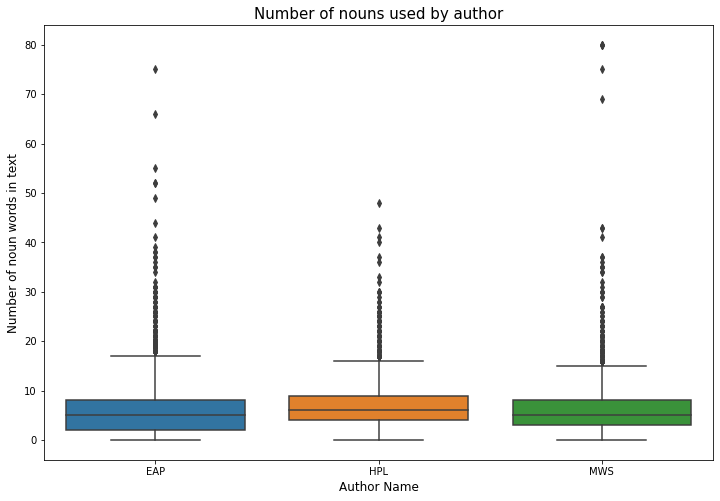

In [57]:
#train_df['noun_tokens'].loc[train_df['noun_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='noun_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of noun words in text', fontsize=12)
plt.title("Number of nouns used by author", fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


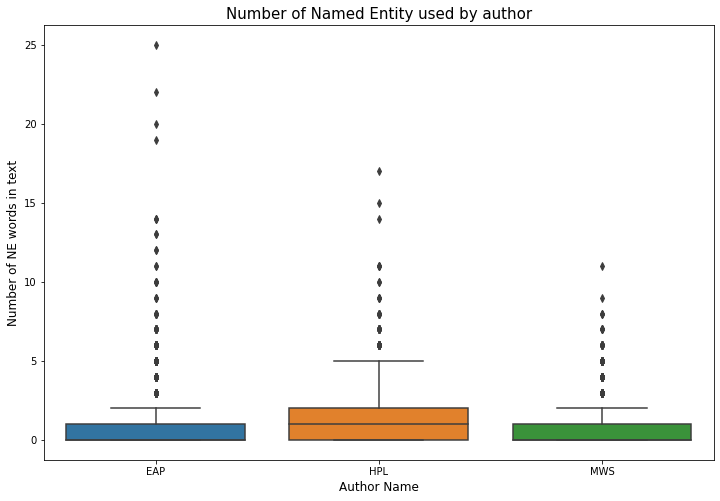

In [56]:
train_df['entity_tokens'].loc[train_df['entity_tokens']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='entity_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of NE words in text', fontsize=12)
plt.title("Number of Named Entity used by author", fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


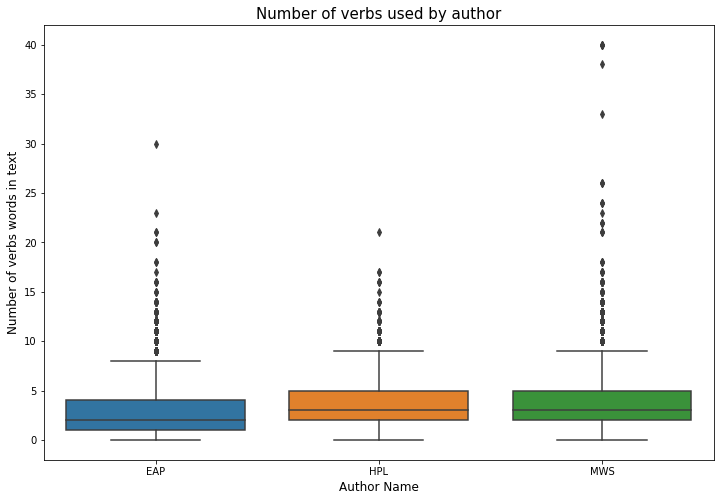

In [55]:
train_df['verb_tokens'].loc[train_df['verb_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='verb_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of verbs words in text', fontsize=12)
plt.title("Number of verbs used by author", fontsize=15)
plt.show()

In [6]:
train_df['all_pos'][0]

NameError: ignored

In [0]:
def extract_adj(text):
    return [(tok.text,tok.ADJ) for tok in nlp(text) ]

def add_adj(train_df):
    train_df['adj'] = train_df['text'].apply(extract_adj)

In [4]:
add_adj(train_df)
display(train_df)

NameError: ignored

In [5]:
train_df['adj_tokens'] = [len(token) for token in train_df.adj]

NameError: ignored

In [0]:
train_df['adj_tokens'].loc[train_df['adj_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='adj_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of adjective words in text', fontsize=12)
plt.title("Number of adjective used by author", fontsize=15)
plt.show()

In [0]:
def extract_conj(text):
    return [(tok.text,tok.CONJ) for tok in nlp(text) ]

def add_conj(train_df):
    train_df['conj'] = train_df['text'].apply(extract_conj)

In [0]:
add_conj(train_df)
display(train_df)

In [0]:
train_df['conj_tokens'] = [len(token) for token in train_df.conj]

In [0]:
train_df['conj_tokens'].loc[train_df['conj_tokens']>40] = 40 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.boxplot(x='author', y='conj_tokens', data=train_df)
plt.xlabel('Author Name', fontsize=12)
plt.ylabel('Number of conjuction words in text', fontsize=12)
plt.title("Number of conjuction used by author", fontsize=15)
plt.show()